In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [143]:
data = pd.read_pickle("kulich.pkl")

In [154]:
d = {'001':'Центральный АО',
    '012':'Центральный АО',
    '013':'Центральный АО',
    '014':'Центральный АО',
    '002':'Уральский АО',
    '003':'Северо-западный округ',
    '011':'Северо-западный округ',
    '005':'Северо-западный округ',
    '004':'Приволжский АО',
    '006':'Приволжский АО',
    '007':'Приволжский АО',
    '008':'Южный АО',
    '009':'Сибирский АО',
    '010':'Сибирский АО',
    '015':'Сибирский АО',
    '016':'Сибирский АО',
    '017':'Сибирский АО',
    }
data['region'] = data.study_name.str[:3].apply(lambda x: d[x])

In [155]:
regs = sorted(list(set(d.values())|set(['all'])))
hormones = pd.DataFrame(np.random.rand(7,2),
                        columns=pd.MultiIndex.from_product([['a'], ['Median','IQR']]),
                        index=regs)

## АМГ (нг/мл)

### все значения:

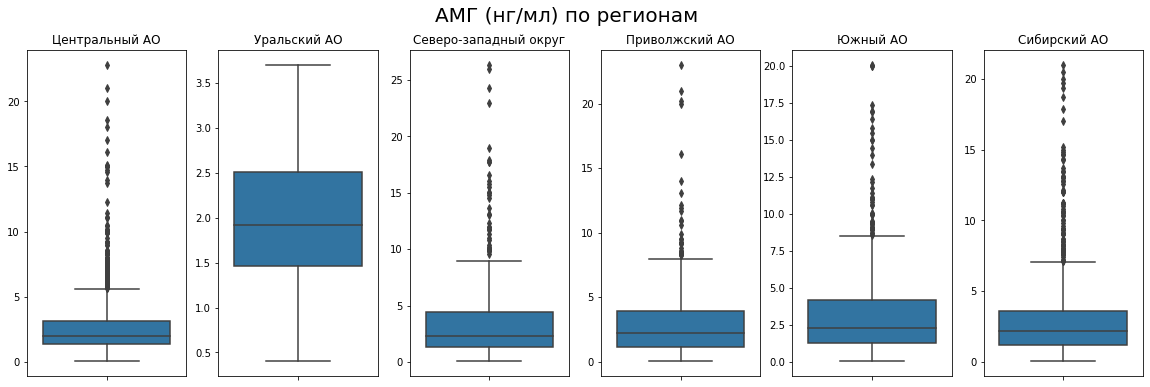

In [156]:
hor_dict = {}
for i in data['region'].unique():
    arr = data[data.region == i]['АМГ (нг/мл)'].apply(pd.Series).to_numpy().flatten()
    arr = arr[~np.isnan(arr)]
    hor_dict[i] = arr

fig, axes = plt.subplots(1, 6, figsize = (20, 6))
axes = axes.flatten()
for i, j in enumerate(hor_dict.keys()):
    sns.boxplot(y = hor_dict[j], ax = axes[i])
    axes[i].set_title(j)
plt.suptitle("АМГ (нг/мл) по регионам", size = 20)
pass

### только минимальные:

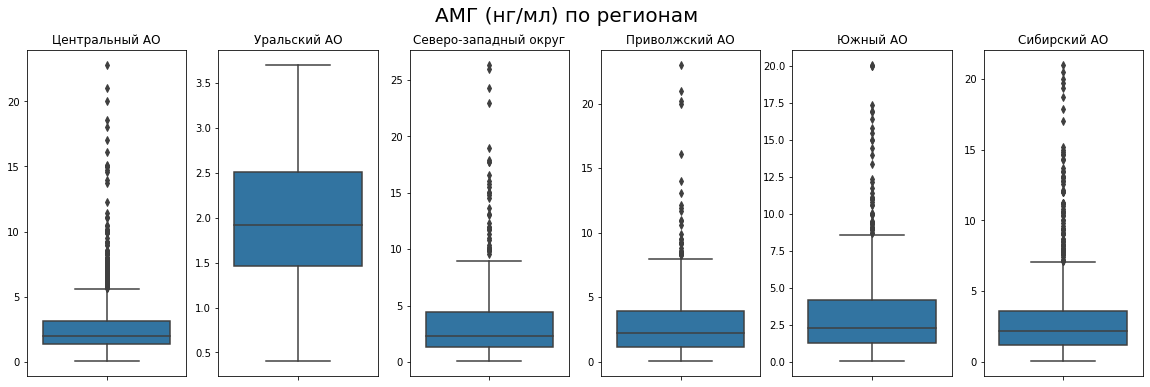

In [157]:
hor_dict = {}
for i in data['region'].unique():
    arr = data[data.region == i]['АМГ (нг/мл)'].apply(lambda x: min(x) if type(x)!=float else x).dropna().to_numpy()
    hor_dict[i] = arr

fig, axes = plt.subplots(1, 6, figsize = (20, 6))
axes = axes.flatten()
for i, j in enumerate(hor_dict.keys()):
    sns.boxplot(y = hor_dict[j], ax = axes[i])
    axes[i].set_title(j)
plt.suptitle("АМГ (нг/мл) по регионам", size = 20)
pass

### статистика по минимуму

In [158]:
from scipy.stats import iqr

In [160]:
name = 'АМГ (нг/мл)'

hormones = hormones.join(pd.DataFrame(np.random.rand(7,2),
                    columns=pd.MultiIndex.from_product([[name], ['Median','IQR']]),
                    index=regs))
hormones.drop(columns = 'a', inplace = True)

alls = np.empty(1)
for i in hor_dict.keys():
    hormones.loc[i, (name, "IQR")] = iqr(hor_dict[i])
    hormones.loc[i, (name, "Median")] = np.median(hor_dict[i])
    alls = np.append(alls, hor_dict[i])

hormones.loc["all", (name, "IQR")] = iqr(alls)
hormones.loc["all", (name, "Median")] = np.median(alls)

hormones

АМГ (нг/мл)       
                           Median    IQR
all                          2.10  2.200
Приволжский АО               2.23  2.795
Северо-западный округ        2.31  3.120
Сибирский АО                 2.19  2.350
Уральский АО                 1.92  1.050
Центральный АО               2.00  1.700
Южный АО                     2.30  2.915

## ФСГ (МЕ/л)

### все значения:

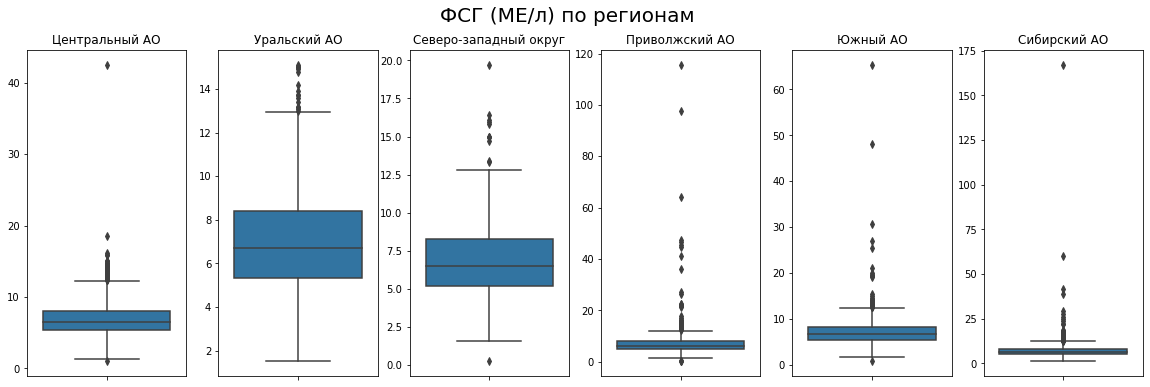

In [161]:
hor_dict = {}
for i in data['region'].unique():
    arr = data[data.region == i]['ФСГ (МЕ/л)'].apply(pd.Series).to_numpy().flatten()
    arr = arr[~np.isnan(arr)]
    hor_dict[i] = arr

fig, axes = plt.subplots(1, 6, figsize = (20, 6))
axes = axes.flatten()
for i, j in enumerate(hor_dict.keys()):
    sns.boxplot(y = hor_dict[j], ax = axes[i])
    axes[i].set_title(j)
plt.suptitle("ФСГ (МЕ/л) по регионам", size = 20)
pass

### только минимальные:

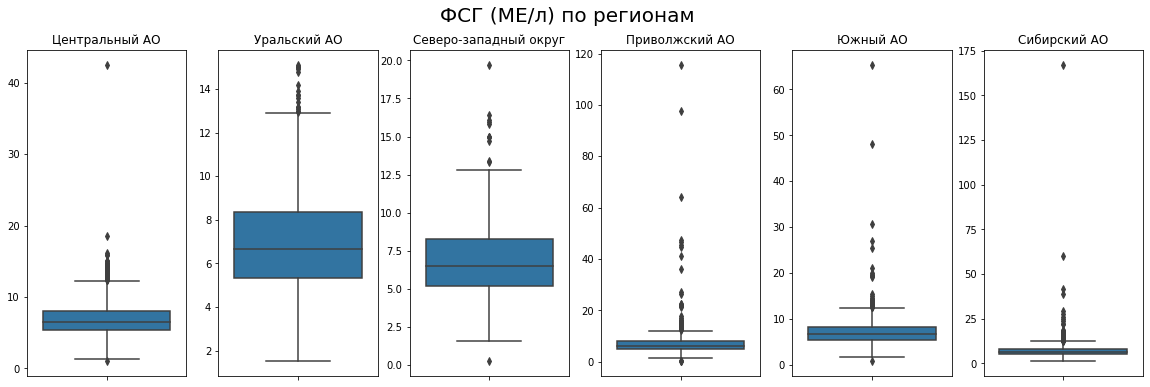

In [162]:
hor_dict = {}
for i in data['region'].unique():
    arr = data[data.region == i]['ФСГ (МЕ/л)'].apply(lambda x: min(x) if type(x)!=float else x).dropna().to_numpy()
    hor_dict[i] = arr

fig, axes = plt.subplots(1, 6, figsize = (20, 6))
axes = axes.flatten()
for i, j in enumerate(hor_dict.keys()):
    sns.boxplot(y = hor_dict[j], ax = axes[i])
    axes[i].set_title(j)
plt.suptitle("ФСГ (МЕ/л) по регионам", size = 20)
pass

### статистика по минимуму

In [163]:
name = 'ФСГ (МЕ/л)'

hormones = hormones.join(pd.DataFrame(np.random.rand(7,2),
                    columns=pd.MultiIndex.from_product([[name], ['Median','IQR']]),
                    index=regs))
alls = np.empty(1)
for i in hor_dict.keys():
    hormones.loc[i, (name, "IQR")] = iqr(hor_dict[i])
    hormones.loc[i, (name, "Median")] = np.median(hor_dict[i])
    alls = np.append(alls, hor_dict[i])

hormones.loc["all", (name, "IQR")] = iqr(alls)
hormones.loc["all", (name, "Median")] = np.median(alls)

hormones

АМГ (нг/мл)        ФСГ (МЕ/л)        
                           Median    IQR     Median     IQR
all                          2.10  2.200      6.500  2.9000
Приволжский АО               2.23  2.795      6.230  2.9250
Северо-западный округ        2.31  3.120      6.480  3.0675
Сибирский АО                 2.19  2.350      6.300  3.0000
Уральский АО                 1.92  1.050      6.680  3.0500
Центральный АО               2.00  1.700      6.500  2.8000
Южный АО                     2.30  2.915      6.765  2.8175

## Пролактин (нг/мл)

### все значения:

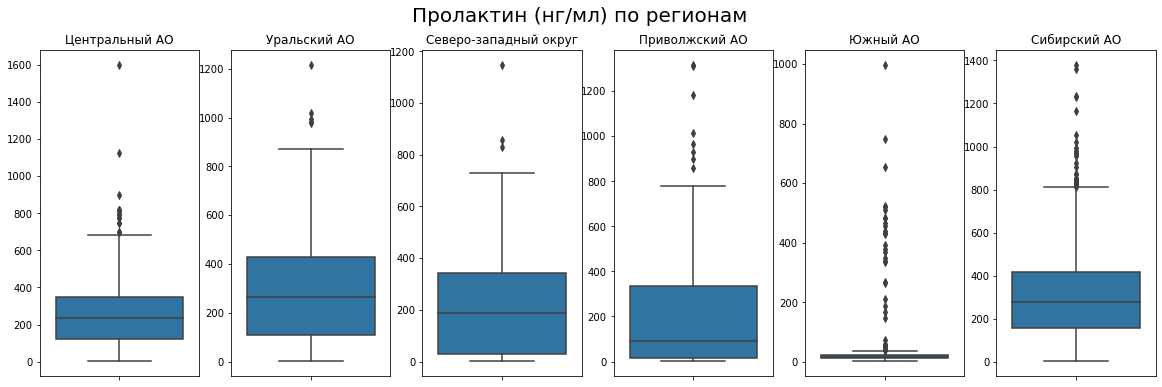

In [164]:
hor_dict = {}
for i in data['region'].unique():
    arr = data[data.region == i]['Пролактин (нг/мл)'].apply(pd.Series).to_numpy().flatten()
    arr = arr[~np.isnan(arr)]
    hor_dict[i] = arr

fig, axes = plt.subplots(1, 6, figsize = (20, 6))
axes = axes.flatten()
for i, j in enumerate(hor_dict.keys()):
    sns.boxplot(y = hor_dict[j], ax = axes[i])
    axes[i].set_title(j)
plt.suptitle("Пролактин (нг/мл) по регионам", size = 20)
pass

### только минимальные:

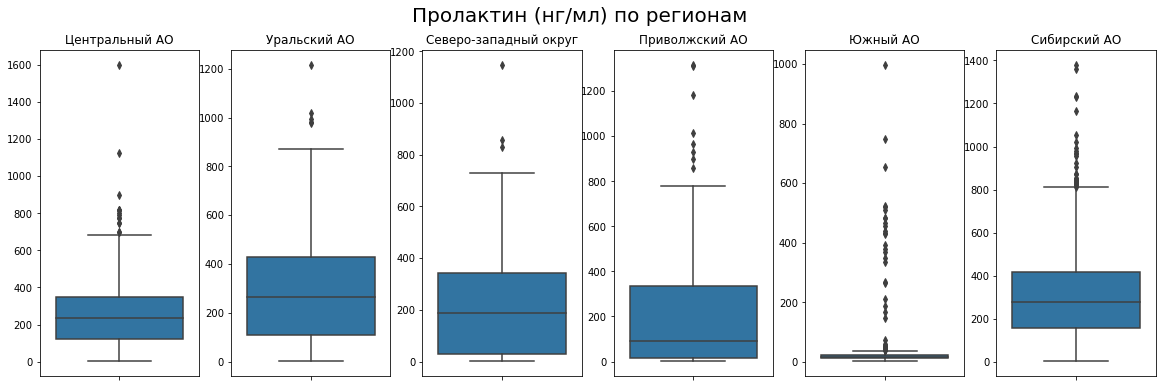

In [165]:
hor_dict = {}
for i in data['region'].unique():
    arr = data[data.region == i]['Пролактин (нг/мл)'].apply(lambda x: min(x) if type(x)!=float else x).dropna().to_numpy()
    hor_dict[i] = arr

fig, axes = plt.subplots(1, 6, figsize = (20, 6))
axes = axes.flatten()
for i, j in enumerate(hor_dict.keys()):
    sns.boxplot(y = hor_dict[j], ax = axes[i])
    axes[i].set_title(j)
plt.suptitle("Пролактин (нг/мл) по регионам", size = 20)
pass

### статистика по минимуму

In [166]:
name = 'Пролактин (нг/мл)'

hormones = hormones.join(pd.DataFrame(np.random.rand(7,2),
                    columns=pd.MultiIndex.from_product([[name], ['Median','IQR']]),
                    index=regs))
alls = np.empty(1)
for i in hor_dict.keys():
    hormones.loc[i, (name, "IQR")] = iqr(hor_dict[i])
    hormones.loc[i, (name, "Median")] = np.median(hor_dict[i])
    alls = np.append(alls, hor_dict[i])

hormones.loc["all", (name, "IQR")] = iqr(alls)
hormones.loc["all", (name, "Median")] = np.median(alls)

hormones

АМГ (нг/мл)        ФСГ (МЕ/л)         Пролактин (нг/мл)  \
                           Median    IQR     Median     IQR            Median   
all                          2.10  2.200      6.500  2.9000           192.200   
Приволжский АО               2.23  2.795      6.230  2.9250            89.395   
Северо-западный округ        2.31  3.120      6.480  3.0675           188.000   
Сибирский АО                 2.19  2.350      6.300  3.0000           277.200   
Уральский АО                 1.92  1.050      6.680  3.0500           265.500   
Центральный АО               2.00  1.700      6.500  2.8000           237.000   
Южный АО                     2.30  2.915      6.765  2.8175            16.235   

                                
                           IQR  
all                    327.000  
Приволжский АО         319.595  
Северо-западный округ  314.500  
Сибирский АО           261.850  
Уральский АО           320.000  
Центральный АО         230.000  
Южный АО                10.712

## ТТГ (МЕ/л)

### все значения:

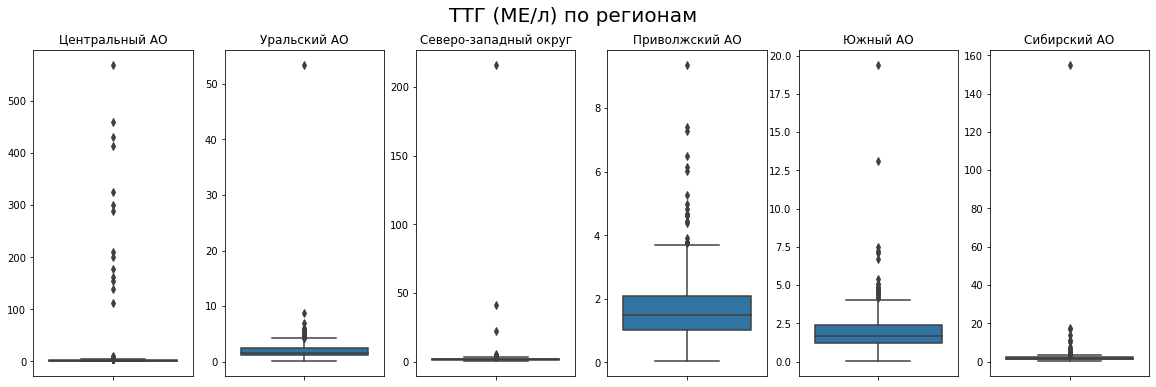

In [167]:
hor_dict = {}
for i in data['region'].unique():
    arr = data[data.region == i]['ТТГ (МЕ/л)'].apply(pd.Series).to_numpy().flatten()
    arr = arr[~np.isnan(arr)]
    hor_dict[i] = arr

fig, axes = plt.subplots(1, 6, figsize = (20, 6))
axes = axes.flatten()
for i, j in enumerate(hor_dict.keys()):
    sns.boxplot(y = hor_dict[j], ax = axes[i])
    axes[i].set_title(j)
plt.suptitle("ТТГ (МЕ/л) по регионам", size = 20)
pass

### только минимальные:

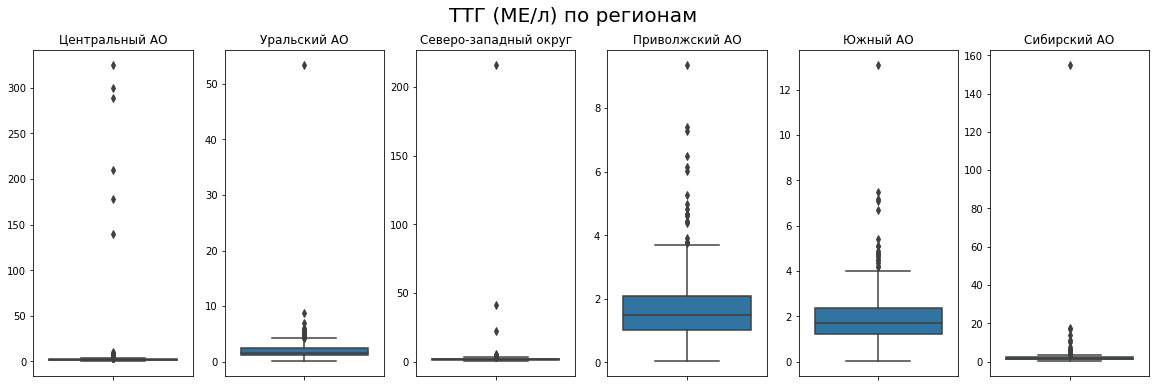

In [168]:
hor_dict = {}
for i in data['region'].unique():
    arr = data[data.region == i]['ТТГ (МЕ/л)'].apply(lambda x: min(x) if type(x)!=float else x).dropna().to_numpy()
    hor_dict[i] = arr

fig, axes = plt.subplots(1, 6, figsize = (20, 6))
axes = axes.flatten()
for i, j in enumerate(hor_dict.keys()):
    sns.boxplot(y = hor_dict[j], ax = axes[i])
    axes[i].set_title(j)
plt.suptitle("ТТГ (МЕ/л) по регионам", size = 20)
pass

### статистика по минимуму

In [169]:
name = 'ТТГ (МЕ/л)'

hormones = hormones.join(pd.DataFrame(np.random.rand(7,2),
                    columns=pd.MultiIndex.from_product([[name], ['Median','IQR']]),
                    index=regs))
alls = np.empty(1)
for i in hor_dict.keys():
    hormones.loc[i, (name, "IQR")] = iqr(hor_dict[i])
    hormones.loc[i, (name, "Median")] = np.median(hor_dict[i])
    alls = np.append(alls, hor_dict[i])

hormones.loc["all", (name, "IQR")] = iqr(alls)
hormones.loc["all", (name, "Median")] = np.median(alls)

hormones

АМГ (нг/мл)        ФСГ (МЕ/л)         Пролактин (нг/мл)  \
                           Median    IQR     Median     IQR            Median   
all                          2.10  2.200      6.500  2.9000           192.200   
Приволжский АО               2.23  2.795      6.230  2.9250            89.395   
Северо-западный округ        2.31  3.120      6.480  3.0675           188.000   
Сибирский АО                 2.19  2.350      6.300  3.0000           277.200   
Уральский АО                 1.92  1.050      6.680  3.0500           265.500   
Центральный АО               2.00  1.700      6.500  2.8000           237.000   
Южный АО                     2.30  2.915      6.765  2.8175            16.235   

                               ТТГ (МЕ/л)          
                           IQR     Median     IQR  
all                    327.000       1.62  1.0875  
Приволжский АО         319.595       1.50  1.0875  
Северо-западный округ  314.500       1.70  0.9400  
Сибирский АО           261.850       1.54  1.0100  
Уральский АО           320.000       1.65  1.2650  
Центральный АО         230.000       1.60  1.0900  
Южный АО                10.712       1.70  1.1800

In [170]:
hormones.to_excel("hormones_region_stats.xlsx")